# Assignment

For this assignment, you are going to apply statistical inference on [Titanic dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv).

|##### More specifically, the tasks that you need to enounter in your deliverables are:

1. Familiarize yourself with the dataset. Review the structure of it and focus on the fields necessary to answer the above mentioned questions.

2. State the null and the alternative hypotheses that address the questions.

3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.

4. Perform an exploratory analysis with summary statistics and corresponding visualizations, in order to gain a clearer view about the distributions of the samples. Focus on their differences.

5. Perform the necessary normality checks in order to make sure that you can conduct the statistical tests.

6. Apply t-test statistic if you pass successfully the normality checks

7. For this exercise, you will also need to write a function to calculate the confidence interval using the standard error for comparing two means (used in t-statistic):

$$
    \bar{X_1} - \bar{X_2} \pm z*\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}
$$

- $z$ is the critical value
- $s_1$ sample 1 standard deviation
- $s_2$ sample 2 standard deviation

- Let $z=1.96$ for a 95% confidence level

- Use the following method signature:

    `def get_95_ci(data1, data2)`
    

8. Elaborate on the results of your analyses.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv")

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
survived_y = df.loc[df['Survived'] == 1]
survived_n = df.loc[df['Survived'] == 0]

## 2. State the null and the alternative hypotheses that address the questions.

#### Ho - There is no difference in survivability and age
#### Ha - There is a significant difference in survivability and age

## 3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.

In [7]:
# since there are people with a null for age, they need to be dropped from the DataFrame
f_survived_y = survived_y.dropna()
f_survived_n = survived_n.dropna()

*Try to answer the following questions. Include a hypothesis and the test assumptions. **If the assumptions are valid**, try to conduct the t-test and addditionally calculate manually the 95% confidence interval which is derived from the hypothesis that you try to evaluate. Also try to come up with some valid findings from the data.*

1. Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important?
2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

*As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find.*

Age; Survived: DescribeResult(nobs=123, minmax=(0.92, 80.0), mean=32.905853658536586, variance=221.71546053578567, skewness=0.11036517600265433, kurtosis=0.031225201077919262)

Age; Dead: DescribeResult(nobs=60, minmax=(2.0, 71.0), mean=41.35, variance=247.73135593220334, skewness=-0.30756108127889464, kurtosis=-0.2764299013556979)


Text(0, 0.5, 'Number of People')

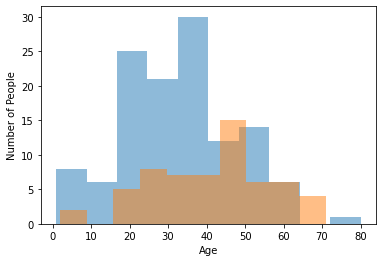

In [25]:
print('Age; Survived: ' + str(stats.describe(f_survived_y['Age'])) + '\n')
print('Age; Dead: ' + str(stats.describe(f_survived_n['Age'])))

plt.hist(f_survived_y['Age'], alpha = .5)
plt.hist(f_survived_n['Age'], alpha = .5)
plt.xlabel('Age')
plt.ylabel('Number of People')

### Since every condition is checked for the difference between age and survivability, we now move on to the t-test.

## 6. Apply t-test statistic if you pass successfully the normality checks

In [24]:
print(stats.ttest_ind(f_survived_y['Age'], f_survived_n['Age']))

Ttest_indResult(statistic=-3.53435125095576, pvalue=0.0005189503307881672)


## *"Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important?"*
#### A p-value of ~ 0.0005, assuming the null hypothesis is true, means that there is a 0.05% probability of obtaining the observed difference due to random chance. Since the p-value is < 0.05 and the t-statistic lies to the left of the mean, the difference is statistically important, meaning, age is a factor in survivability.

Fare; Survived: DescribeResult(nobs=342, minmax=(0.0, 512.3292), mean=48.39540760233918, variance=4435.160158368154, skewness=3.8458166819167294, kurtosis=20.343694359915972)

Fare; Dead: DescribeResult(nobs=549, minmax=(0.0, 263.0), mean=22.117886885245902, variance=985.2195092053387, skewness=4.540690741165962, kurtosis=26.12023942326097)


Text(0, 0.5, 'Number of People')

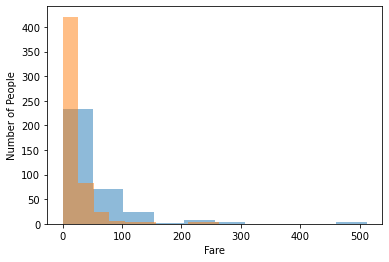

In [27]:
print('Fare; Survived: ' + str(stats.describe(survived_y['Fare'])) + '\n')
print('Fare; Dead: ' + str(stats.describe(survived_n['Fare'])))

plt.hist(survived_y['Fare'], alpha = 0.5)
plt.hist(survived_n['Fare'], alpha = 0.5)
plt.xlabel("Fare")
plt.ylabel('Number of People')

## *"Is there a correlation between fare price and survival? Again, is this difference statistically important?"*
#### Since the difference in variance of fare and survived along with those who did not survive is too high, the t-test cannot apply to the non-normally distributed values despite having a large enough sample size.

## 7. For this exercise, you will also need to write a function to calculate the confidence interval using the standard error for comparing two means (used in t-statistic):

$$
    \bar{X_1} - \bar{X_2} \pm z*\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}
$$

- $z$ is the critical value
- $s_1$ sample 1 standard deviation
- $s_2$ sample 2 standard deviation

- Let $z=1.96$ for a 95% confidence level

- Use the following method signature:

    `def get_95_ci(data1, data2)`

In [10]:
#function definition for 95 CI
def get_95_ci(data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    sd1 = np.std(data1)
    sd2 = np.std(data2)
    m1 = data1.mean()
    m2 = data2.mean()
    uci = m1 - m2 + 1.96 * np.sqrt((sd1**2/n1)+(sd2**2/n2))
    lci = m1 - m2 - 1.96 * np.sqrt((sd1**2/n1)+(sd2**2/n2))
    print('Upper Confidence Interval: ' + str(uci))
    print('Lower Confidence Interval: ' + str(lci))
    
get_95_ci(f_survived_y['Age'], f_survived_n['Age'])
get_95_ci(survived_y['Fare'], survived_n['Fare'])

Upper Confidence Interval: -3.7043689147255696
Lower Confidence Interval: -13.18392376820126
Upper Confidence Interval: 33.79781564645632
Lower Confidence Interval: 18.757225787730242


## Elaborate on the results of your analyses.
### With 95% confidence, the difference in age between survivors and people who died is between ~ 4 and ~ 13 years.
### Also, with 95% confidence, the difference in fare between survivors and people who died is between ~ 18 and ~ 33.